In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

In [3]:
df=pd.read_csv('homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
15,1175,2,42.0
12,1000,2,38.0
3,1521,3,75.0
7,3300,4,155.0
6,2732,4,135.0


In [4]:
from sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_x=sx.fit_transform(df.drop('price',axis='columns'))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
df['price']

0      39.07
1     120.00
2      62.00
3      75.00
4      51.00
5      38.00
6     135.00
7     155.00
8      50.00
9     167.00
10     82.00
11    140.00
12     38.00
13     40.00
14    101.00
15     42.00
16     48.00
17     60.00
18    102.00
19     32.00
Name: price, dtype: float64

df['price']
This part selects the price column from the DataFrame df. It returns a pandas Series containing the values of the price column.

Converting the Series to a NumPy array:

python
Copy code
df['price'].values
The .values attribute converts the pandas Series to a NumPy array. This is useful because NumPy arrays offer more functionality and are more efficient for numerical computations.

Reshaping the NumPy array:

python
Copy code
df['price'].values.reshape(df.shape[0], 1)
The reshape method changes the shape of the NumPy array. In this case, df.shape[0] gives the number of rows in the DataFrame (i.e., the number of data points). The reshape(df.shape[0], 1) converts the 1D array of shape (n,) (where n is the number of data points) into a 2D array of shape (n, 1)

In [6]:
#we need to convert it into 2-d array since its just a single data frame
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

below the x.shape[1]->it represents the column present in x like area and bedroom/ it represents the total no. of columns or attributes
x.shape[0]->it represents the total values or rows

In [7]:
w=np.ones(shape=(2))
#the both ones represents the weights ,these are initial weights used for calculation
w

array([1., 1.])

to find the y_predicted which is price=w1*area+w2*bedrooms+b
we need to multiple one by one all (area with w1) and all (bedrooms with w2)
and we can achive this using the transpose and dot multiplication of the matrices 

In [8]:
#.T is used to find the transpose of the matrix
#this would seperate the area and bedrooms into two seperate columns
#due to which the w1 * area and w2 * bedroom is possible 
scaled_x.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [9]:
np.dot(w,scaled_x.T)
#this is equals to w1* area +w2* bedrooms
#we can use this below

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [10]:
def batch_gradient_descent(x,y_true,epochs,learning_rate=0.01):
    number_of_features=x.shape[1]
    #since we need the total of 2 w's one for area and second bedroom
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=x.shape[0]

    cost_list=[]
    epochs_list=[]
    for i in range(epochs):
        y_predicted=np.dot(w,scaled_x.T)+b

        #to find the updated w=(w1,w2) and bias we need to use equation
        #w=w-learning_rate*d(error)/d(w)
        #to achieve this we need to first find gradient of w(d/dw) and bias using formula

        w_grad=-(2/total_samples)*(x.T.dot(y_true-y_predicted))
        b_grad=-(2/total_samples)*np.sum(y_true-y_predicted)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad

        #to plot the b/w epochs and cost(error/mse) we need mse
        cost=np.mean(np.square(y_true-y_predicted))
        #to plot the graph we need to track cost and epochs using the list we only keep track of some iterations
        #lets say once in a every 10th iteration
        if i%10==0:
            cost_list.append(cost)
            epochs_list.append(i)
    return w,b,cost,cost_list,epochs_list

#now calling the funciton
w,b,cost,cost_list,epochs_list=batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)

print(f'w1:{w[0]},\n,w2:{w[1]},\n,b:{b},\n,cost:{cost}')


         

w1:0.707124642770257,
,w2:0.6745652664894097,
,b:-0.23034857438407427,
,cost:0.0068641890429808105


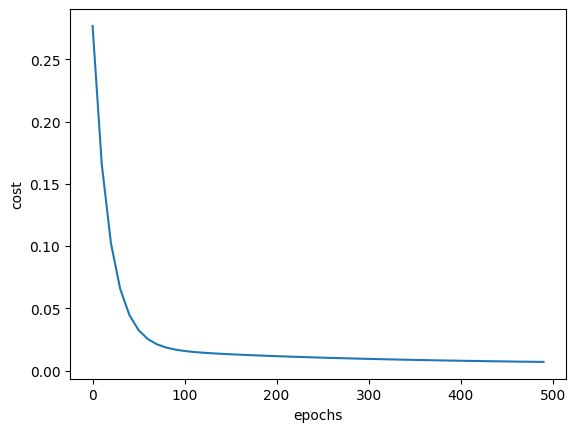

In [11]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epochs_list,cost_list)

above graph shows that as the values of the epochs increases teh chances of the loss fucntion or error or cost decreases as the w and b is adjusted 

now writing the predicting function 
before that lets learn how sx.transform and sy.inverse_Transform works

In [12]:
sx.transform([[2600,4]])
#this is the scaling function

c:\vscode\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [13]:
#to perform reverse of the scaling we use the inverse_transform
sy.inverse_transform([[1,0.5,0]])

array([[167. ,  99.5,  32. ]])

In [14]:
#now using the final weight w and bias b we can predict any price
def predict(area,bedrooms,w,b):
    scaled_x=sx.transform([[area,bedrooms]])[0]
    scaled_price=w[0]*scaled_x[0]+w[1]*scaled_x[1]+b
    return sy.inverse_transform([[scaled_price]])

predict(2600,4,w,b)

c:\vscode\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.45484403]])

now implementing the stochastic gradient descent algorithms manually which chooses the data sample randomly and then after it starts to update the w adn b after every epoch
it dont follw the w*feature method

In [17]:
from numpy import random

In [26]:
def stochastic_descent(x,y_true,epochs,learning_rate=0.01):
    number_of_features=x.shape[1]
    #since we need the total of 2 w's one for area and second bedroom
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=x.shape[0]

    cost_list=[]
    epochs_list=[]
    for i in range(epochs):
        random_index=random.randint(0,total_samples-1)
        sample_x=x[random_index]
        sample_y=y_true[random_index]

        
        y_predicted=np.dot(w,sample_x.T)+b

        #to find the updated w=(w1,w2) and bias we need to use equation
        #w=w-learning_rate*d(error)/d(w)
        #to achieve this we need to first find gradient of w(d/dw) and bias using formula

        w_grad=-(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad=-(2/total_samples)*np.sum(sample_y-y_predicted)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad

        #to plot the b/w epochs and cost(error/mse) we need mse
        cost=np.mean(np.square(sample_y-y_predicted))
        #to plot the graph we need to track cost and epochs using the list we only keep track of some iterations
        #lets say once in a every 10th iteration
        if i%100==0:
            cost_list.append(cost)
            epochs_list.append(i)
    return w,b,cost,cost_list,epochs_list

#now calling the funciton
w_sgd,b_sgd,cost_sgd,cost_list_sgd,epochs_list_sgd=stochastic_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)


w_sgd,b_sgd,cost_sgd

         

(array([0.72031233, 0.70483461]), -0.2618288948357008, 0.007062442653123452)

In [25]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

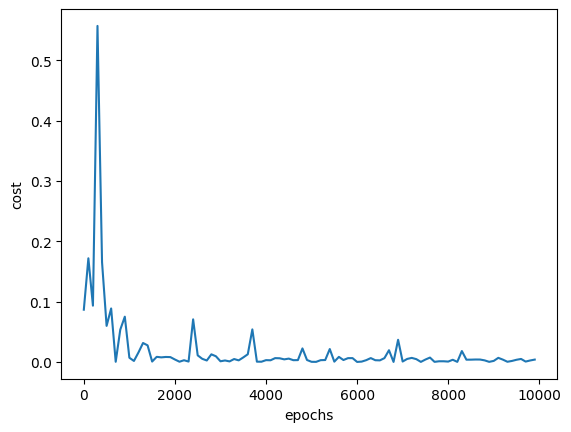

In [27]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epochs_list_sgd,cost_list_sgd)

In [28]:
predict(2600,4,w_sgd,b_sgd)

c:\vscode\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.37480898]])

: 